# Занятие 12

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Оценка распределений

### Дискретное

In [2]:
N = 10000
sample = np.random.choice([1,2,3,4,5,6], N)
sample

array([6, 1, 4, ..., 3, 1, 2])

In [3]:
# оценим функцию вероятности частотами
unique_value, counts = np.unique(sample, return_counts=True)

print(counts)
print(counts / N)
print(unique_value)
print (np.sum(counts / N))

[1685 1669 1651 1688 1639 1668]
[0.1685 0.1669 0.1651 0.1688 0.1639 0.1668]
[1 2 3 4 5 6]
1.0


In [4]:
for N in [10, 100, 1000, 10000, 100000]:
    sample = np.random.choice([1,2,3,4,5,6], N)
    unique_value, counts = np.unique(sample, return_counts=True)
    print(unique_value)
print("{}: {}".format(N, counts/N))

[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]
[1 2 3 4 5 6]
100000: [0.16446 0.16598 0.16759 0.16618 0.16915 0.16664]


In [5]:
1/6

0.16666666666666666

### Непрерывное

In [7]:
# возьмём выборку из нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
#sample

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


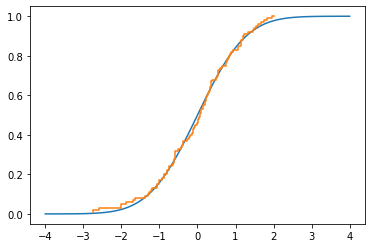

In [8]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='Теоретическая функция распределения')

# Воспользуемся библиотекой для оценки (спасибо питон!)
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Оценка функции распределения')


[ 2.  3.  3. 11. 17. 16. 21. 11.  9.  7.]


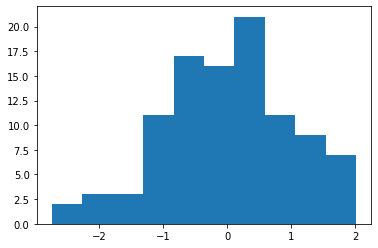

In [19]:
# теперь посмотрим на функцию плотности
b, n, _ = plt.hist(sample, )
print(b)

In [21]:
len(n)

11

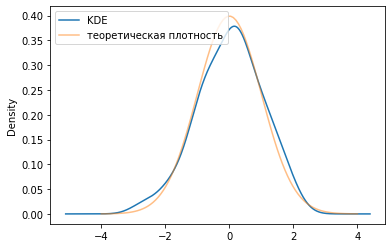

In [11]:
# ядерное сглаживание
# можно сделать в pandas
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# строим теоретическую плотность
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

### Предсказательный интервал
Имеем $X \sim N(\mu, \sigma^2)$. Согласно правилу [2-х сигм](https://ru.wikipedia.org/wiki/%D0%A1%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%BE%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5#%D0%9F%D1%80%D0%B0%D0%B2%D0%B8%D0%BB%D0%BE_%D1%82%D1%80%D1%91%D1%85_%D1%81%D0%B8%D0%B3%D0%BC) имеем $$\mathbf{P}(\mu - 2 \sigma \leq X \leq \mu + 2 \sigma) \approx 0.95$$



Если мы применим данное правило к стандартному нормальному распределению $X \sim N(0,1)$, то получим
$$\mathbf{P}(0 - 2 \cdot 1 \leq X \leq 0 + 2 \cdot 1) \approx 0.95$$

Проиллюстрируем это визуально

In [22]:
# возьмём выборку из стандартного нормального распределения
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)
sample

array([ 0.19586554, -0.32645854,  1.37841873,  0.05644193,  0.27634523,
       -0.64843652, -0.55544114,  1.27938143, -0.05688084,  1.10053493,
        0.43067134,  1.52618692,  0.97763214,  0.6609747 ,  2.04896774,
        1.26823719, -0.0076089 ,  1.80126922,  1.06557422,  0.45195011,
        2.13559716, -0.63480747,  0.32171915,  0.221919  , -1.14327495,
        1.65267413, -0.36524437,  1.71130845,  0.65613443,  1.29246751,
       -1.26612917,  0.49269345,  0.57812574,  0.58074073, -1.82159824,
        0.93919058,  0.37313739,  0.29289039,  0.61478404, -1.08390434,
        1.46556684, -1.36436272,  0.37014293, -0.36270162,  0.56445085,
        0.22351235, -1.1802369 ,  0.45752174,  0.82279917, -0.2615973 ,
        1.81139573, -0.92054607, -1.17579002,  0.01224624,  0.7150252 ,
       -0.50443753,  0.89406255,  0.17783502, -0.13420911,  2.32046568,
        0.61481415,  0.19967764, -0.80193062,  0.87217128,  1.81426792,
        0.12919714, -0.51772328, -0.5513211 ,  1.23936592, -0.44

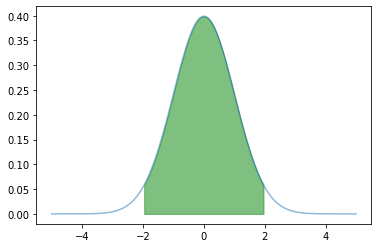

In [31]:
x = np.linspace(-5,5,10000000)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
to_fill = np.linspace(-1.96, 1.96, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

In [33]:
norm_rv.pdf(-4)

0.00013383022576488537

Оценка эта неточная, и не всегда нам нужно именно 0.95 вероятностной массы. 

В общем случае работают с квантилями

In [25]:
norm_rv.ppf(0.5)

0.0

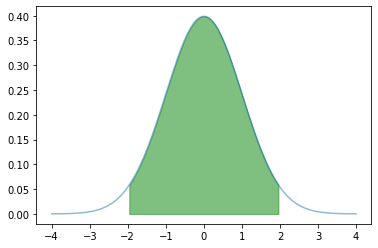

In [26]:
alpha = 0.05
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
q_a = norm_rv.ppf(alpha/2)
q_b = norm_rv.ppf(1-alpha/2)
to_fill = np.linspace(q_a, q_b, 100)
plt.fill_between(to_fill, norm_rv.pdf(to_fill), alpha=0.5, color='green')

Теперь, если мы хотим найти такой интервал в котором с вероятностью 95% окажется реализация нашей случайной величины, нам лишь нужно найти соответствующие квантили $X_{\frac{\alpha}{2}}$ и $X_{1-\frac{\alpha}{2}}$.

Такой интервал можем найти для произвольно распределенной случайной величины

В частности, для нормально распределенной случайной величины
$$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \sigma \leq X \leq \mu + \zeta_{1-\frac{\alpha}{2}} \sigma) = 1-\alpha$$

$\zeta_{\alpha}$ будем обозначать квантиль порядка $\alpha$ стандартного нормального распределения (то-есть распределения $N(0,1)$). Тут мы воспользовались тем, что $\zeta_{\frac{\alpha}{2}} = - \zeta_{1-\frac{\alpha}{2}}$

$ \zeta_{0.975} \approx 1.95996 \approx 2$



**Предсказательный интервал оценивает диапазон значений**

### Доверительный интервал
Точечные оценки параметров это уже что-то, но также представляет интерес и то, в каком диапазоне изменяются оцениваемые параметры, например, средние значения.

Отвечают на вопрос **в каком диапазоне скорее всего лежит оцениваемый параметр**



Например, снова возьмем выборку из нормального распределения $X^n = (X_1, \dotso, X_n),\ X \sim \mathbf{N}(\mu, \sigma^2)$

Пусть нам известна дисперсия, т.е $\sigma^2$. Тогда по [свойствам](http://www.machinelearning.ru/wiki/index.php?title=%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) нормального распределения получаем $\sum_{i=1}^{n} X_i \sim \mathbf{N}(n\mu, n\sigma^2) \rightarrow \frac{\sum_{i=1}^{n} X_i}{n} = \overline{X_n} \sim \mathbf{N}(\mu, \frac{\sigma^2}{n})$

По формуле для предсказательного интервала получаем $$\mathbf{P}(\mu - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \overline{X_n} \leq \mu + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

Теперь, переносим $\overline{X_n}$ и $\mu$ в неравенствах, и получаем доверительный интервал для $\mu$

$$\mathbf{P}(\overline{X_n} - \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}} \leq \mu \leq \overline{X_n} + \zeta_{1-\frac{\alpha}{2}} \frac{\sigma}{\sqrt{n}}) = 1-\alpha$$

In [59]:
# Задание, 
# 1) сгенерируйте 10, 50, 100 примеров из нормального распределения с произвольными мат ожиданием и дисперсией
# 2) Постройте по формуле интервал с alpha = 0.05
# ваш код тут
mu = 5
sigma = 7
norm_rv = sts.norm(mu, sigma)
N = [10, 50, 100, 1000000]
alpha = 0.05
for n in N:
    samples = np.linspace(-1, 11, n)
    pdf = norm_rv.pdf(samples)
    qa = norm_rv.ppf(alpha/2)
    qb = norm_rv.ppf(1-alpha/2)
    print("Для N= %.f ДИ %.4f ... %.4f" % (n,samples[np.argmax(pdf)] - qa*np.sqrt(sigma/n), samples[np.argmax(pdf)] + qb*np.sqrt(sigma/n) ))

Для N= 10 ДИ 11.6288 ... 19.9954
Для N= 50 ДИ 8.1402 ... 11.8818
Для N= 100 ДИ 7.2464 ... 9.8922
Для N= 1000000 ДИ 5.0231 ... 5.0495


Случай известной дисперсии как правило встречается для измерительных приборов, когда нам известная его погрешность.

Есть метод, позволяющий построить доверительный интервал и для такого случая. Разница будет лишь в том, что вместо выборочной дисперсии будет взята выборочная дисперсия, а вместо квантилей стандартного нормального распределения используют квантили распределения Стьюдента (согласно которой распределена так называемая t-статистика)

Но что делать, если распределение отлично от нормального или это доподлино неизвестно?


К счастью...


## Центральная предельная теорема

In [42]:
a = 1
b = 4

# обратите внимание, что в этой функции задается левая граница и масштаб, а не левая и правая границы:
uniform_rv = sts.uniform(a, b-a)

uniform_rv.rvs(10)

array([3.73879258, 3.41515209, 1.62517182, 3.82367588, 3.98738979,
       2.5093152 , 1.87148606, 3.13162054, 1.24886677, 3.36333214])

In [43]:
N = 100
# сгенерируем много выборочных средних
means = []
for i in range(10000):
  means.append(np.mean(uniform_rv.rvs(N)))

(array([0.00929456, 0.        , 0.00929456, 0.00929456, 0.01858912,
        0.00929456, 0.02788368, 0.04647281, 0.06506193, 0.10224018,
        0.1208293 , 0.19518579, 0.21377492, 0.38107702, 0.38107702,
        0.45543351, 0.67850299, 0.73427036, 1.06887458, 1.23617668,
        1.47783528, 1.65443195, 1.9797416 , 2.50953161, 2.90919776,
        3.34604215, 3.81077022, 3.52263882, 3.89442128, 4.45209497,
        4.36844392, 4.79599375, 4.55433515, 4.81458287, 4.50786234,
        4.33126567, 3.82935935, 4.02454514, 3.26239109, 2.946376  ,
        2.8255467 , 2.37940775, 2.42588056, 1.63584283, 1.51501353,
        1.208293  , 0.91086703, 0.75285948, 0.58555738, 0.53908457,
        0.39966615, 0.2416586 , 0.18589123, 0.21377492, 0.13941842,
        0.07435649, 0.03717825, 0.08365105, 0.00929456, 0.00929456,
        0.01858912]),
 array([2.15080905, 2.16156803, 2.17232701, 2.18308599, 2.19384497,
        2.20460395, 2.21536293, 2.22612191, 2.23688089, 2.24763987,
        2.25839885, 2.2691

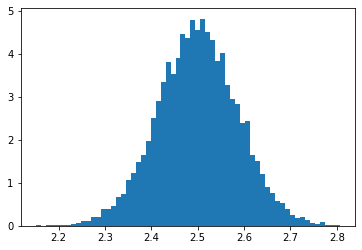

In [44]:
plt.hist(means, density=True, bins='auto')

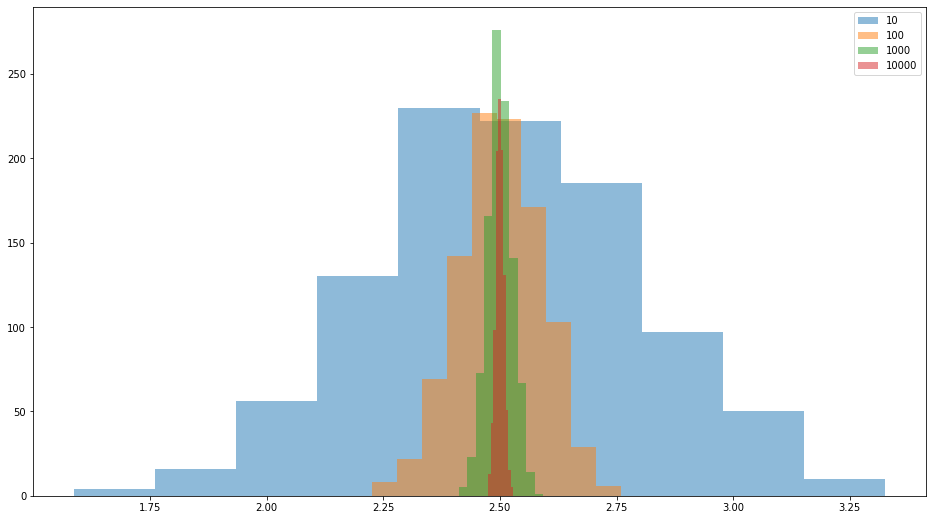

In [45]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
  means = []
  for i in range(1000):
    means.append(np.mean(uniform_rv.rvs(N)))
  plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

In [46]:
N = 30
# сгенерируем много выборочных средних
means = []
for i in range(1000):
  means.append(np.mean(uniform_rv.rvs(N)))

means = np.array(means).astype(np.float32)

In [47]:
uniform_rv.mean()

2.5

In [48]:
uniform_rv.var()

0.75

In [49]:
uniform_rv.std()

0.8660254037844386

[]

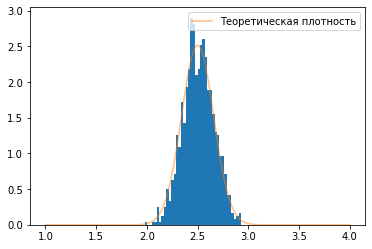

In [50]:
norm_rv = sts.norm(loc=uniform_rv.mean(), scale=uniform_rv.std() / np.sqrt(N))
plt.hist(means, density=True, bins=40)
x = np.linspace(1,4, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='Теоретическая плотность', alpha=0.5)
plt.legend()
plt.plot()

In [51]:
data = uniform_rv.rvs(N)
print("Доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(data) - 2 * uniform_rv.std() / np.sqrt(N), np.mean(data) + 2 * uniform_rv.std() / np.sqrt(N) 
))

Доверительный интервал для среднего по цпт, если нам известна дисперсия: [2.3552481013078843, 2.9877036333415603] 


#### То же и для дискретных, посмотрим на примере биномиального распределения

In [52]:
binomial_rv = sts.binom(20, 0.4)
binomial_rv.rvs(10)

# мат ожидание np = 20*0.4 = 8
# дисперсия npq = np(1-p) = 20*0.4*0.6 = 8 * 0.6 = 4.8

array([ 7, 10, 11,  8,  6,  8,  8, 12,  9,  8])

Text(0.5, 0, '$x$')

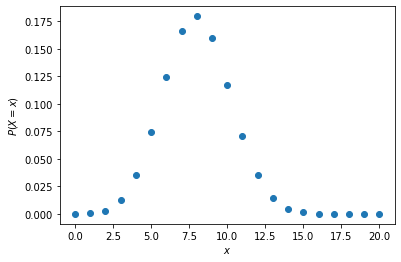

In [53]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

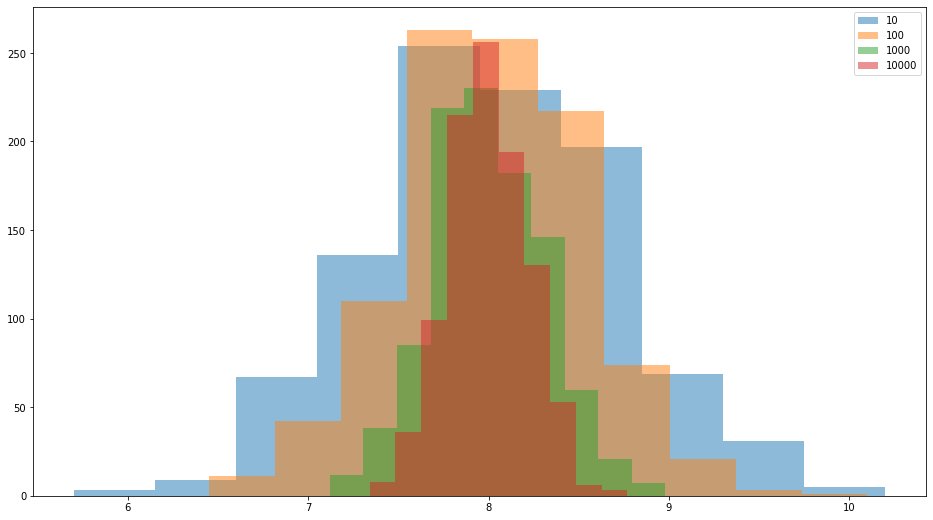

In [54]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
  means = []
  for i in range(1000):
    means.append(np.mean(binomial_rv.rvs(N)))
  plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()

### Всегда ли ЦПТ хорошо работает?
Вообще в полной формулировке есть формальные требования, определяющие границы применимости данной теоремы. Но пока что, будем говорить, что применять ЦПТ можно, если кол-во примеров по крайней мере пара десятков (30-50), и само распределение случайно величины $X$ не является явно ассимметричным ("скошенным")

#### Попробуем уменьшить вероятность успеха в серии n независимых испытаний, тем самым, сделаем наше распределение успехов несколько более ассиметричным

In [55]:
binomial_rv = sts.binom(20, 0.01)
binomial_rv.rvs(10)

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

Text(0.5, 0, '$x$')

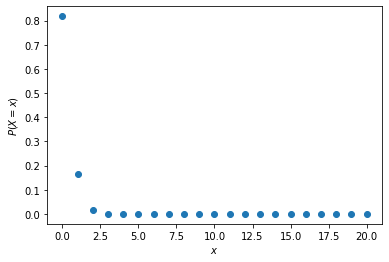

In [56]:
x = np.linspace(0,20,21)
pmf = binomial_rv.pmf(x)
plt.plot(x, pmf, 'o')
plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

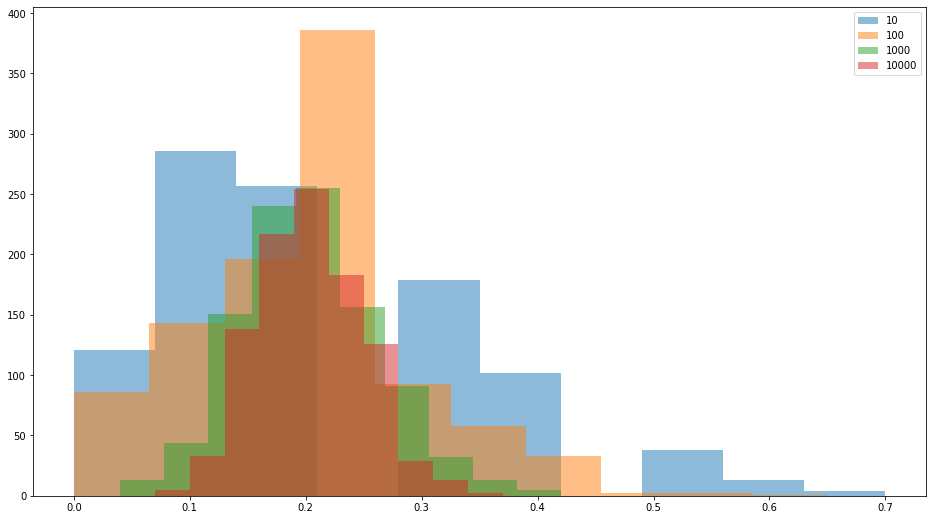

In [57]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 20, 50, 100]:
  means = []
  for i in range(1000):
    means.append(np.mean(binomial_rv.rvs(N)))
  plt.hist(means, alpha=0.5)

plt.legend(['10', '100', '1000', '10000'])
plt.show()